In [9]:
import sys
sys.path.insert(1, '/Algoritmos')
from Algoritmos.tcubicos import CubicSplines

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.precision", 10) #ejecutar esta línea para mejorar la presición de pandas más dígitos

# Desarrollo actividad 1

In [10]:
# 1. Importar y organizar los datos dados
with open('Actividad TC/datos/DatosEMA-2020-03-29.csv', 'r', newline='') as f:
    reader = csv.reader(f, delimiter=',')
    next(reader) # Eliminar encabezado
    datos_radiacion = list()
    fechas = list()
    for line in reader:
        datos_radiacion.append(float(line[4]))
        fechas.append(line[0][-14:-9]) # guarda la hora de cada linea
datos_radiacion = datos_radiacion[360:1083]
fechas = fechas[360:1083]
datos = list()
i = 0
for dato in datos_radiacion:
    datos.append((i, dato))
    i += 60
#cinco primeros datos
print(datos[:5])
#cinco primeras horas
print(fechas[:5])

[(0, 1.86), (60, 3.03), (120, 5.24), (180, 5.53), (240, 6.12)]
['06:00', '06:01', '06:02', '06:03', '06:04']


In [11]:
#2. Aplicar el método de trazadores cúbicos
matriz_tcubicos = np.array(CubicSplines(datos))

Los polinomios del trazador cúbico son:

$s_1(x) = 1.86 + 1.26102289 \cdot 10^{-2} x + 1.91382530\cdot 10^{-6}x^3$

$s_2(x) = 3.03 + 3.32795421 \cdot 10^{-2} (x-60) + 3.44488554\cdot 10^{-4} (x-60)^2+ 1.91382530\cdot 10^{-6} (x-60)^3$

$s_3(x) = 5.24 + 2.32716025 \cdot 10^{-2} (x-120) - 5.11287548\cdot 10^{-4} (x-120)^2 +1.91382530\cdot 10^{-6} (x-120)^3$

$s_4(x) = 5.53 -1.36595210 \cdot 10^{-3} (x-180) + 1.00661638\cdot 10^{-4} (x-180)^2+ 1.91382530\cdot 10^{-6} (x-180)^3$

$s_5(x) = 6.12 + 2.61922059 \cdot 10^{-2} (x-240) + 3.58640996\cdot 10^{-4} (x-240)^2 + 1.91382530\cdot 10^{-6} (x-240)^3$

$...$

$s_{721}(x) = ...$

$s_{722}(x) = ...$

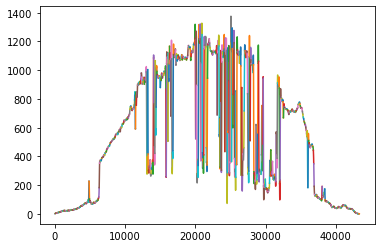

In [12]:
#3. Gráfica
def f_cubica(x, t, a, b, c, d):
    return a + b*(x-t) + c*(x-t)**2 + d*(x-t)**3

fig, ax = plt.subplots()
for i in range(0,722):
    x = np.linspace(60*i, 60*(i + 1), 60)
    ax.plot(x, f_cubica(x, 60*i, matriz_tcubicos.T[i][0], matriz_tcubicos.T[i][1], 
                        matriz_tcubicos.T[i][2],matriz_tcubicos.T[i][3]))

In [13]:
#4. Visualización de los datos
dataset = list()
for i in range(len(matriz_tcubicos.T)):
    dataset.append([fechas[i],'{} - {}'.format(datos[i],datos[i + 1]), matriz_tcubicos.T[i][0], 
                    matriz_tcubicos.T[i][1], matriz_tcubicos.T[i][2], matriz_tcubicos.T[i][3]])
m_coeficientes = pd.DataFrame(dataset, columns=['HORA','SEG', 'a_0', 'a_1', 'a_2', 'a_3']).set_index('HORA')


In [14]:
m_coeficientes

SEG   a_0           a_1           a_2  \
HORA                                                                     
06:00         (0, 1.86) - (60, 3.03)  1.86  0.0126102289  0.0000000000   
06:01       (60, 3.03) - (120, 5.24)  3.03  0.0332795421  0.0003444886   
06:02      (120, 5.24) - (180, 5.53)  5.24  0.0232716025 -0.0005112875   
06:03      (180, 5.53) - (240, 6.12)  5.53 -0.0013659521  0.0001006616   
06:04      (240, 6.12) - (300, 7.59)  6.12  0.0261922059  0.0003586410   
...                              ...   ...           ...           ...   
17:57  (43020, 3.62) - (43080, 2.74)  3.62 -0.0199108625  0.0002759720   
17:58  (43080, 2.74) - (43140, 1.27)  2.74 -0.0207365921 -0.0002897341   
17:59  (43140, 1.27) - (43200, 1.42)  1.27 -0.0146427691  0.0003912978   
18:00  (43200, 1.42) - (43260, 1.86)  1.42  0.0133076686  0.0000745428   
18:01  (43260, 1.86) - (43320, 0.24)  1.86 -0.0090879053 -0.0004478024   

                a_3  
HORA                 
06:00  0.0000019138  
06:01 -0.0000047543  
06:02  0.0000033997  
06:03  0.0000014332  
06:04 -0.0000064474  
...             ...  
17:57 -0.0000031428  
17:58  0.0000037835  
17:59 -0.0000017598  
18:00 -0.0000029019  
18:01  0.0000024878  

[722 rows x 5 columns]